In [9]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import statsmodels.graphics.api as smg

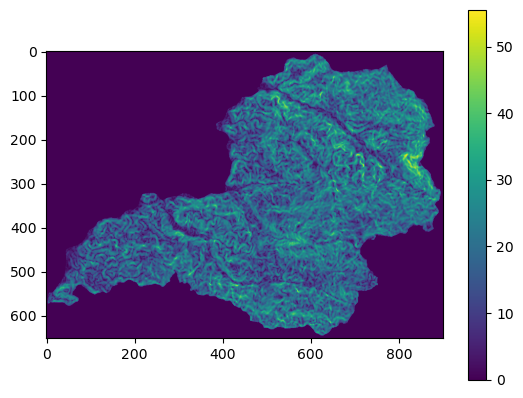

In [38]:
raster = rio.open(r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\slope.tif")
pendiente=raster.read(1)
plt.imshow(pendiente)
plt.colorbar();

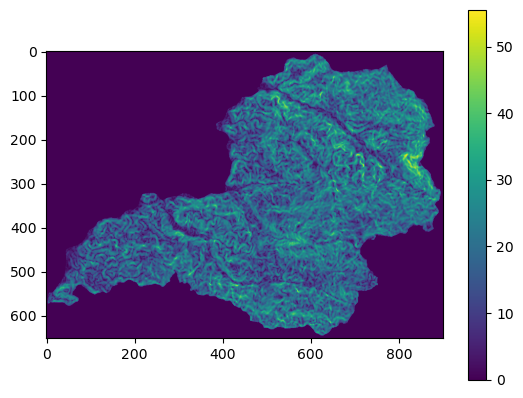

In [39]:
pendiente=np.where(pendiente<0,np.nan,pendiente)
plt.imshow(pendiente)
plt.colorbar();

In [19]:
type(pendiente)

numpy.ndarray

In [40]:
np.shape(pendiente)

(651, 901)

In [21]:
pendiente_vector=pendiente.ravel()  # para pasarlo a un vector
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)] # para eliminar  del vector los datos NaN
pendiente_vector_MenM.shape # otra forma de saber las dimensiones

(259233,)

Forma: (586551,)


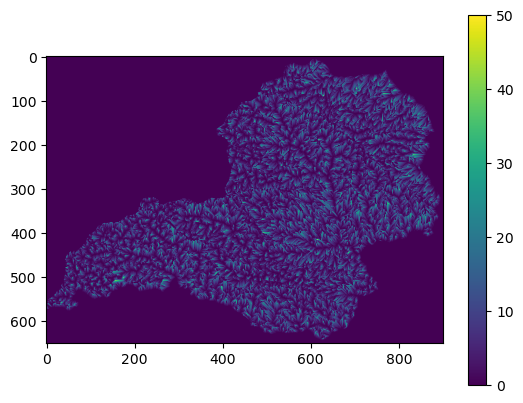

In [45]:
raster = rio.open(r'C:\Users\Santi-PC\Desktop\Con fe se puede\Carto_new\flowac_raste.tif')
flujo=raster.read(1)
flujo=np.where(flujo<0,np.nan,flujo)
flujo=np.where(flujo>50,0,flujo)
flujo_vector=flujo.ravel()
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)]
plt.imshow(flujo)
plt.colorbar()
flujo.shape
flujo_vector_MenM.shape
print('Forma:', flujo_vector_MenM.shape)

In [25]:
flujo_vector=flujo.ravel()  # para pasarlo a un vector
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)] # para eliminar  del vector los datos NaN
flujo_vector_MenM.shape # otra forma de saber las dimensiones

(259233,)

Forma:  (651, 901)
Valores únicos:  [1.]


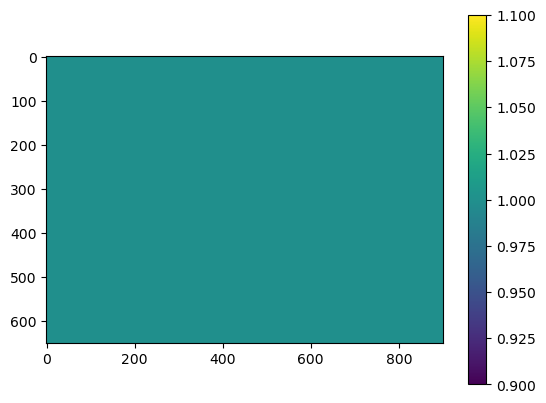

In [53]:
raster = rio.open(r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\slope.tif")
msk=raster.read_masks(1)
msk=np.where(msk==0,np.nan,1)
plt.imshow(msk)
plt.colorbar();

print('Forma: ', msk.shape)
print('Valores únicos: ', np.unique(msk))

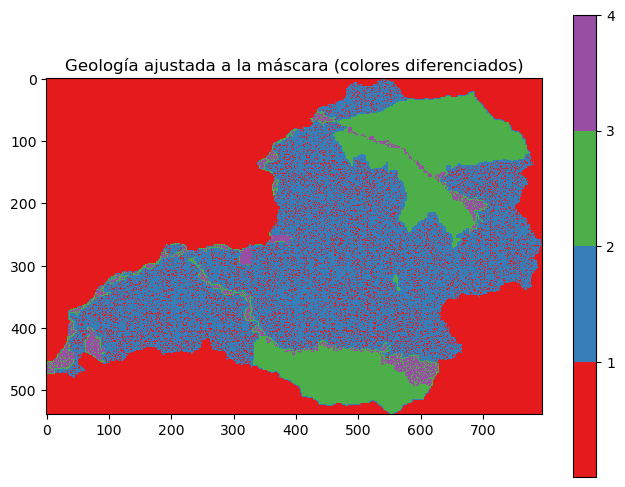

Forma: (538, 796)
Valores únicos: [1. 2. 3. 4.]


In [51]:
import rasterio as rio
from rasterio.enums import Resampling
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# --- Reabrir y remuestrear el raster de geología ---
raster_geo = rio.open(r'C:\Users\Santi-PC\Documents\ArcGIS\Projects\MyProject4\UGI_PolygonToRaster_calid.tif')

geologia_resampleada = raster_geo.read(
    1,
    out_shape=(1, msk.shape[0], msk.shape[1]),
    resampling=Resampling.nearest
).squeeze()

# --- Aplicar la máscara ---
geologia_masc = geologia_resampleada * msk


# Recortar paleta si hay menos categorías, o expandirla si hay más
valores_unicos = np.unique(geologia_masc[geologia_masc != 0])  # Ignora valores enmascarados
cmap = ListedColormap(colores[:len(valores_unicos)])

# --- Visualizar con la paleta nueva ---
plt.figure(figsize=(8, 6))
img = plt.imshow(geologia_masc, cmap=cmap)
plt.colorbar(img, ticks=valores_unicos)
plt.title('Geología ajustada a la máscara (colores diferenciados)')
plt.show()

# --- Imprimir información ---
print('Forma:', geologia_masc.shape)
print('Valores únicos:', valores_unicos)


Valores únicos: [ 1.  2.  3.  4. nan]


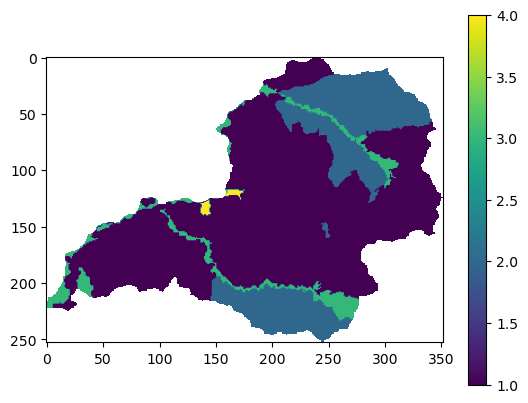

In [52]:
raster = rio.open(r'C:\Users\Santi-PC\Documents\ArcGIS\Projects\MyProject4\UGI_PolygonToRaster_calid.tif')
geologia=raster.read(1)
geologia=np.where(geologia<1,np.nan,geologia)
geologia=np.where(geologia>15,np.nan,geologia)
geologia=np.where(geologia==15,2,geologia)
geologia_vector=geologia.ravel()
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]
plt.imshow(geologia)
plt.colorbar()
geologia_vector_MenM.shape
print('Valores únicos:', np.unique(geologia))

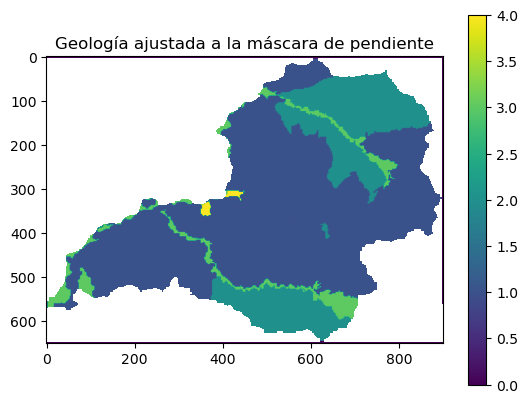

Forma final: (651, 901)
Valores únicos: [0. 1. 2. 3. 4.]


In [55]:
from rasterio.warp import reproject
import rasterio as rio
from rasterio.enums import Resampling
import numpy as np
import matplotlib.pyplot as plt

# --- Raster original de geología ---
with rio.open(r'C:\Users\Santi-PC\Documents\ArcGIS\Projects\MyProject4\UGI_PolygonToRaster_calid.tif') as src_geo:
    geologia_data = src_geo.read(1)
    
    # Procesar valores
    geologia_data = np.where(geologia_data < 1, np.nan, geologia_data)
    geologia_data = np.where(geologia_data > 15, np.nan, geologia_data)
    geologia_data = np.where(geologia_data == 15, 2, geologia_data)

# --- Raster de la máscara ---
with rio.open(r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\slope.tif") as src_mask:
    msk = src_mask.read_masks(1)
    msk = np.where(msk == 0, np.nan, 1)
    
    # Crear un array vacío del tamaño de la máscara
    geologia_resampled = np.empty((src_mask.height, src_mask.width), dtype=geologia_data.dtype)
    
    # Reproyectar el raster de geología al tamaño de la máscara
    with rio.open(r'C:\Users\Santi-PC\Documents\ArcGIS\Projects\MyProject4\UGI_PolygonToRaster_calid.tif') as src_geo:
        rio.warp.reproject(
            source=geologia_data,
            destination=geologia_resampled,
            src_transform=src_geo.transform,
            src_crs=src_geo.crs,
            dst_transform=src_mask.transform,
            dst_crs=src_mask.crs,
            resampling=Resampling.nearest
        )

# --- Aplicar la máscara ---
geologia_masked = geologia_resampled * msk

# --- Mostrar el resultado ---
plt.imshow(geologia_masked)
plt.title('Geología ajustada a la máscara de pendiente')
plt.colorbar()
plt.show()

print('Forma final:', geologia_masked.shape)
print('Valores únicos:', np.unique(geologia_masked[~np.isnan(geologia_masked)]))


In [50]:
np.unique(geologia_masc)

# 1 es Abanico Aluvial
# 2 es Basaltos y andesitas
# 3 es Rocas ultramáficas (dunita, harzburguiras, websteritas y otras)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26.])

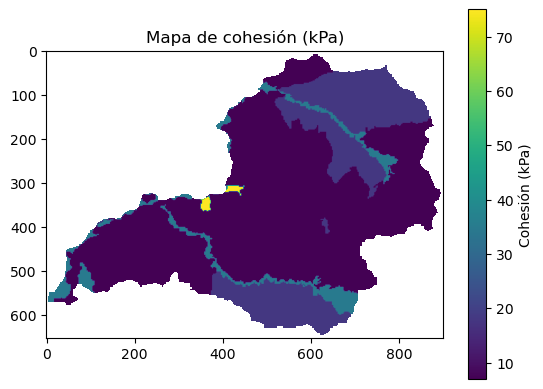

Valores únicos de cohesión: [ 7. 18. 35. 75.]


In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Crear matriz base de cohesión con NaN
cohesion = np.full_like(geologia_masked, np.nan, dtype=float)

# Asignar cohesión según valor de geología en geologia_masked
# (ejemplo: 1 = Muy mala, 2 = Mala, 3 = Regular, 4 = Buena)

cohesion = np.where(geologia_masked == 1, 7, cohesion)    # Muy mala
cohesion = np.where(geologia_masked == 2, 18, cohesion)   # Mala
cohesion = np.where(geologia_masked == 3, 35, cohesion)   # Regular
cohesion = np.where(geologia_masked == 4, 75, cohesion)   # Buena

# Mostrar el resultado
plt.imshow(cohesion, cmap='viridis')
plt.title('Mapa de cohesión (kPa)')
plt.colorbar(label='Cohesión (kPa)')
plt.show()

# Imprimir valores únicos asignados
print('Valores únicos de cohesión:', np.unique(cohesion[~np.isnan(cohesion)]))


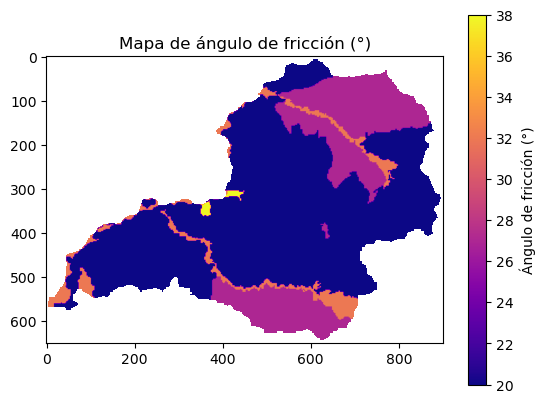

Valores únicos de fricción: [20. 27. 32. 38.]


In [58]:
# Crear matriz base para ángulo de fricción con NaN
friccion = np.full_like(geologia_masked, np.nan, dtype=float)

# Asignar valores según la calidad de roca (sin "Muy buena")
friccion = np.where(geologia_masked == 1, 20, friccion)  # Muy mala
friccion = np.where(geologia_masked == 2, 27, friccion)  # Mala
friccion = np.where(geologia_masked == 3, 32, friccion)  # Regular
friccion = np.where(geologia_masked == 4, 38, friccion)  # Buena

# Mostrar resultado
plt.imshow(friccion, cmap='plasma')
plt.title('Mapa de ángulo de fricción (°)')
plt.colorbar(label='Ángulo de fricción (°)')
plt.show()

# Valores únicos
print('Valores únicos de fricción:', np.unique(friccion[~np.isnan(friccion)]))



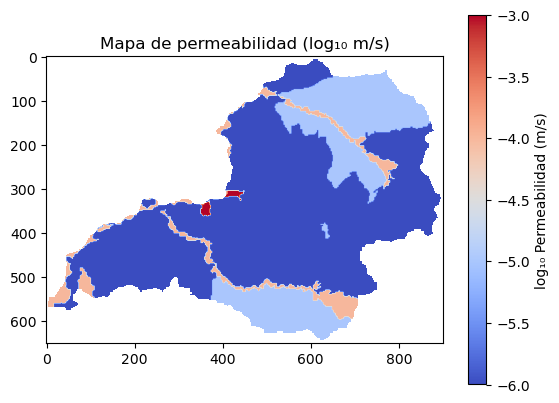

Valores únicos de permeabilidad: [1.e-06 1.e-05 1.e-04 1.e-03]


In [59]:
# Crear matriz base de permeabilidad con NaN
permeabilidad = np.full_like(geologia_masked, np.nan, dtype=float)

# Asignar valores de permeabilidad en m/s
permeabilidad = np.where(geologia_masked == 1, 1e-6, permeabilidad)  # Muy mala
permeabilidad = np.where(geologia_masked == 2, 1e-5, permeabilidad)  # Mala
permeabilidad = np.where(geologia_masked == 3, 1e-4, permeabilidad)  # Regular
permeabilidad = np.where(geologia_masked == 4, 1e-3, permeabilidad)  # Buena

# Mostrar resultado
plt.imshow(np.log10(permeabilidad), cmap='coolwarm')  # log para ver mejor diferencias
plt.title('Mapa de permeabilidad (log₁₀ m/s)')
plt.colorbar(label='log₁₀ Permeabilidad (m/s)')
plt.show()

# Ver valores únicos reales
print('Valores únicos de permeabilidad:', np.unique(permeabilidad[~np.isnan(permeabilidad)]))


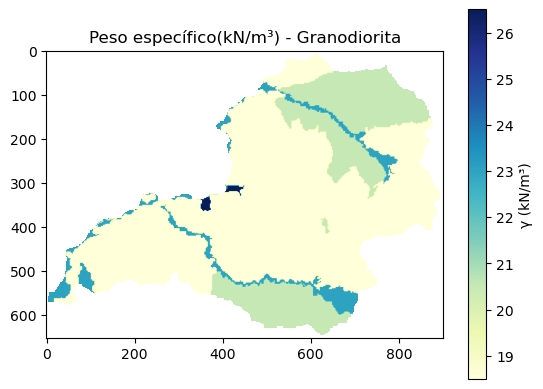

Peso específico asignado: [18.5 20.5 23.  26.5]


In [62]:
# Crear matriz base para peso específico con NaN
peso_especifico = np.full_like(geologia_masked, np.nan, dtype=float)

# Asignar peso específico refinado (kN/m³) basado en calidad y tipo de roca (granodiorita)
peso_especifico = np.where(geologia_masked == 1, 18.5, peso_especifico)  # Muy mala
peso_especifico = np.where(geologia_masked == 2, 20.5, peso_especifico)  # Mala
peso_especifico = np.where(geologia_masked == 3, 23.0, peso_especifico)  # Regular
peso_especifico = np.where(geologia_masked == 4, 26.5, peso_especifico)  # Buena

# Visualizar
plt.imshow(peso_especifico, cmap='YlGnBu')
plt.title('Peso específico(kN/m³) - Granodiorita')
plt.colorbar(label='γ (kN/m³)')
plt.show()

# Ver valores únicos
print('Peso específico asignado:', np.unique(peso_especifico[~np.isnan(peso_especifico)]))


[0.036 0.07  0.087   nan]


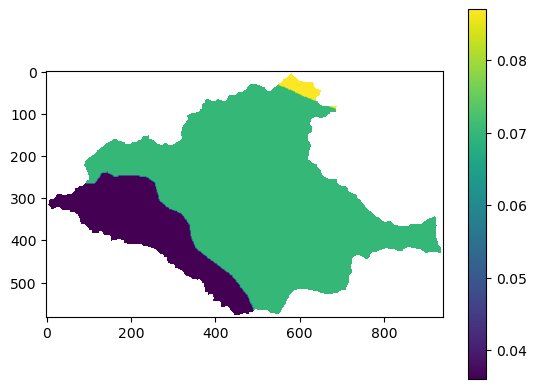

In [15]:
ks=np.where ( geologia==1,0.036,geologia )
ks=np.where ( ks==2,0.070,ks )
ks=np.where ( ks==3,0.087,ks )

plt.imshow(ks)
plt.colorbar()
print(np.unique(ks));

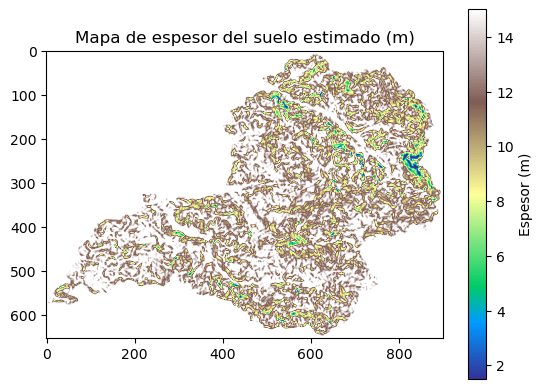

Valores únicos aproximados: [ 1.5        4.2359314  4.2497406 ... 14.963207  14.97129   15.       ]


In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular espesor basado en la pendiente del terreno (en grados)
espesor = np.where(
    pendiente < 15,
    15,  # Zonas planas → suelo acumulado
    np.where(
        (pendiente >= 15) & (pendiente < 40),
        (-0.43 * pendiente) + 21.43,  # Fórmula empírica lineal
        1.5  # Pendientes fuertes (≥40°) → roca aflorante o suelo delgado
    )
)

# Visualizar el mapa de espesor
plt.imshow(espesor, cmap='terrain')
plt.title('Mapa de espesor del suelo estimado (m)')
plt.colorbar(label='Espesor (m)')
plt.show()

# Verificar valores únicos
print('Valores únicos aproximados:', np.unique(espesor))


In [66]:
# Revisar zonas sin datos
print('NaNs en pendiente:', np.isnan(pendiente).sum())
print('NaNs en espesor:', np.isnan(espesor).sum())


NaNs en pendiente: 0
NaNs en espesor: 0


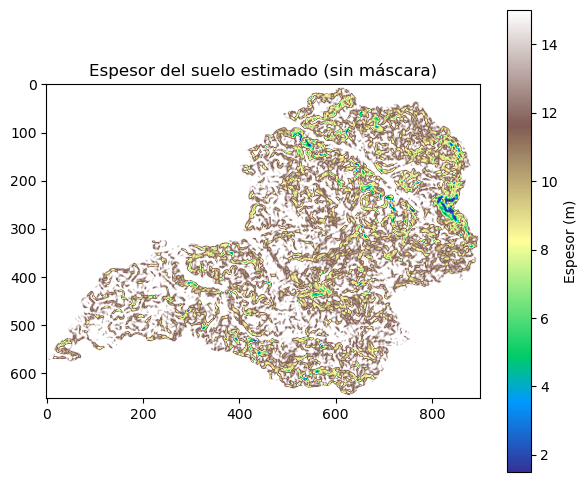

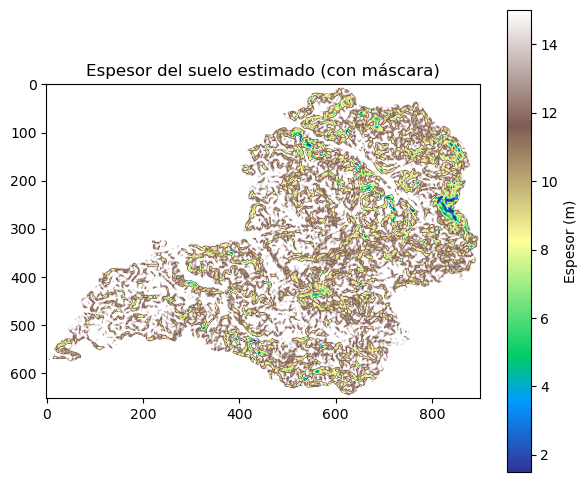

Espesor sin máscara - rango: 1.5 a 15.0
Espesor con máscara - rango: 1.5 a 15.0


In [67]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1. Espesor sin aplicar máscara (todo el dominio)
# ---------------------------

espesor_full = np.where(
    pendiente < 15,
    15,
    np.where(
        (pendiente >= 15) & (pendiente < 40),
        (-0.43 * pendiente) + 21.43,
        1.5
    )
)

plt.figure(figsize=(7, 6))
plt.imshow(espesor_full, cmap='terrain', vmin=1.5, vmax=15)
plt.title('Espesor del suelo estimado (sin máscara)')
plt.colorbar(label='Espesor (m)')
plt.show()


# ---------------------------
# 2. Espesor con máscara aplicada
# ---------------------------

# Asegurarse de que 'msk' está bien definida y tiene el mismo shape
espesor_masked = espesor_full * msk  # Zonas fuera de msk quedan como np.nan (porque msk tiene np.nan)

plt.figure(figsize=(7, 6))
plt.imshow(espesor_masked, cmap='terrain', vmin=1.5, vmax=15)
plt.title('Espesor del suelo estimado (con máscara)')
plt.colorbar(label='Espesor (m)')
plt.show()


# ---------------------------
# 3. Confirmar rangos y valores únicos
# ---------------------------

print('Espesor sin máscara - rango:', np.nanmin(espesor_full), 'a', np.nanmax(espesor_full))
print('Espesor con máscara - rango:', np.nanmin(espesor_masked), 'a', np.nanmax(espesor_masked))


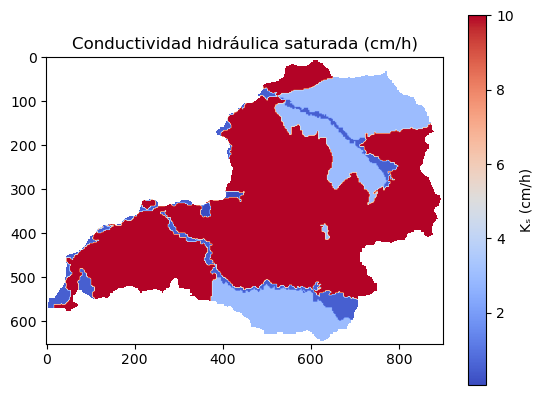

Valores únicos de Kₛ (cm/h): [ 0.05  0.5   3.   10.  ]


In [68]:
# Crear matriz base con NaN
ks = np.full_like(geologia_masked, np.nan, dtype=float)

# Asignar valores en cm/h
ks = np.where(geologia_masked == 1, 10.0, ks)   # Muy mala
ks = np.where(geologia_masked == 2, 3.0, ks)    # Mala
ks = np.where(geologia_masked == 3, 0.5, ks)    # Regular
ks = np.where(geologia_masked == 4, 0.05, ks)   # Buena

# Visualizar
plt.imshow(ks, cmap='coolwarm', vmin=0.05, vmax=10)
plt.title('Conductividad hidráulica saturada (cm/h)')
plt.colorbar(label='Kₛ (cm/h)')
plt.show()

# Verificar valores únicos
print('Valores únicos de Kₛ (cm/h):', np.unique(ks[~np.isnan(ks)]))


In [70]:
GammaW   = 9.81 #peso unitario del agua [kN/m3]
dx = 12.5 # resolucion espacial del raster [m]
q = 100 #intensidad de la precipitacion [mm/h]

In [76]:
MatEst = np.zeros(raster.shape)
Matq   = np.zeros(raster.shape)

M4 = flujo / dx
M5 = ((0.01 * ks * (espesor * np.cos(pendiente)) * np.sin(pendiente)) / (0.001 * q)) * (
     (peso_especifico / GammaW) * (1 - np.tan(pendiente) / np.tan(friccion)) + 
     (cohesion / (GammaW * espesor * np.cos(pendiente)**2 * np.tan(friccion)))
)
MatEst1 = np.where(M4 > M5, 3, MatEst)  # unstable

MatEst2 = np.where(M4 <= M5, 4, MatEst1)  # stable

M1 = np.tan(pendiente)
M2 = (1 - (GammaW / peso_especifico)) * np.tan(friccion) + (
     cohesion / (peso_especifico * espesor * np.cos(pendiente)**2)
)
MatEst3 = np.where(M1 < M2, 1, MatEst2)  # unconditionally stable

M3 = np.tan(friccion) + (
     cohesion / (peso_especifico * espesor * np.cos(pendiente)**2)
)
MatEst4 = np.where(M1 >= M3, 2, MatEst3)  # unconditionally unstable

Matq = (1000 * 0.01 * ks * espesor * np.cos(pendiente) * np.sin(pendiente)) * (dx / flujo) * (
       (peso_especifico / GammaW) * (1 - (np.tan(pendiente) / np.tan(friccion))) + 
       cohesion / (GammaW * espesor * np.cos(pendiente)**2 * np.tan(friccion))
)
np.nanmin(Matq)

MatEst = np.where(MatEst4 == 0, np.nan, MatEst4)
Matq = np.where(Matq == np.inf, np.nanmax(Matq[Matq != np.inf]), Matq)

Matq = np.where(M1 < M2, -1, np.where(M1 >= M3, -2, Matq))


C:\Users\Santi-PC\AppData\Local\Temp\ipykernel_8036\934149403.py:24: RuntimeWarning: divide by zero encountered in divide
  Matq = (1000 * 0.01 * ks * espesor * np.cos(pendiente) * np.sin(pendiente)) * (dx / flujo) * (
C:\Users\Santi-PC\AppData\Local\Temp\ipykernel_8036\934149403.py:24: RuntimeWarning: invalid value encountered in multiply
  Matq = (1000 * 0.01 * ks * espesor * np.cos(pendiente) * np.sin(pendiente)) * (dx / flujo) * (


In [79]:
flujo_safe = np.where(flujo == 0, 0.01, flujo)  # Evita división por cero

Matq = (1000 * 0.01 * ks * espesor * np.cos(pendiente) * np.sin(pendiente)) * (dx / flujo_safe) * (
       (peso_especifico / GammaW) * (1 - (np.tan(pendiente) / np.tan(friccion))) + 
       cohesion / (GammaW * espesor * np.cos(pendiente)**2 * np.tan(friccion))
)


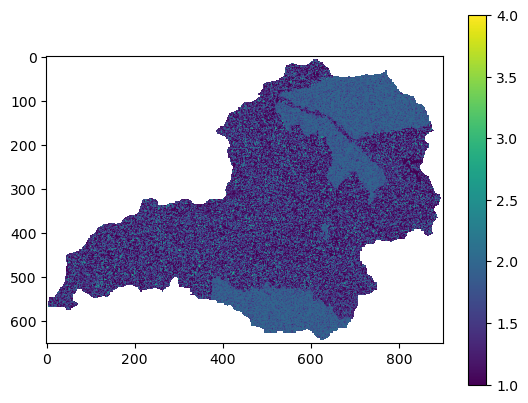

In [80]:
plt.imshow(MatEst)
plt.colorbar()

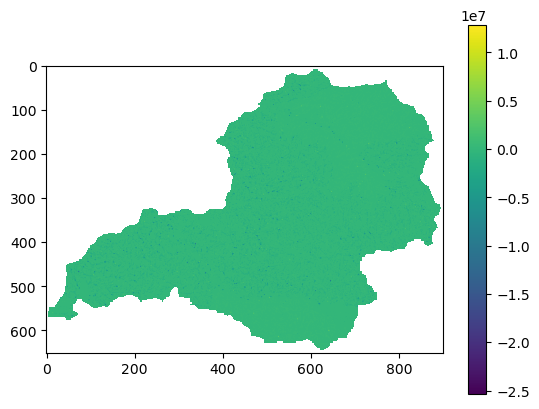

In [81]:
plt.imshow(Matq)
plt.colorbar()

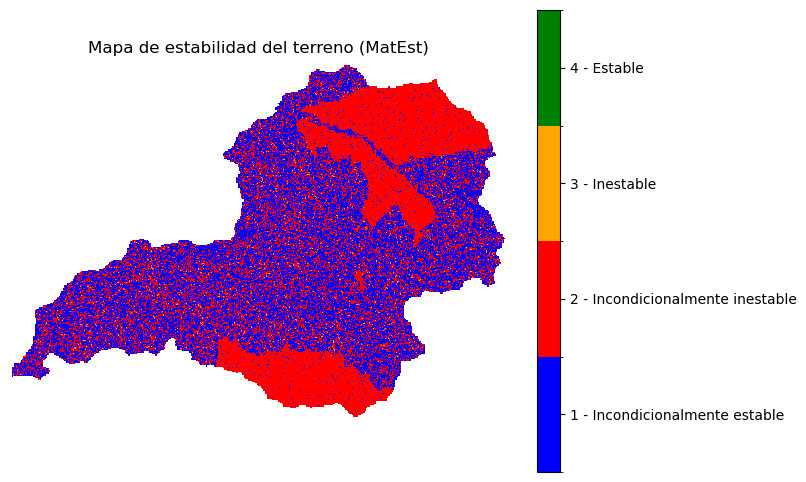

In [77]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Definir colores y etiquetas para cada clase de estabilidad
cmap_est = colors.ListedColormap(['blue', 'red', 'orange', 'green'])  # 1 a 4
bounds = [0.5, 1.5, 2.5, 3.5, 4.5]
norm = colors.BoundaryNorm(bounds, cmap_est.N)

plt.figure(figsize=(8, 6))
plt.imshow(MatEst, cmap=cmap_est, norm=norm)
cbar = plt.colorbar(ticks=[1, 2, 3, 4])
cbar.ax.set_yticklabels([
    '1 - Incondicionalmente estable',
    '2 - Incondicionalmente inestable',
    '3 - Inestable',
    '4 - Estable'
])
plt.title('Mapa de estabilidad del terreno (MatEst)')
plt.axis('off')
plt.show()

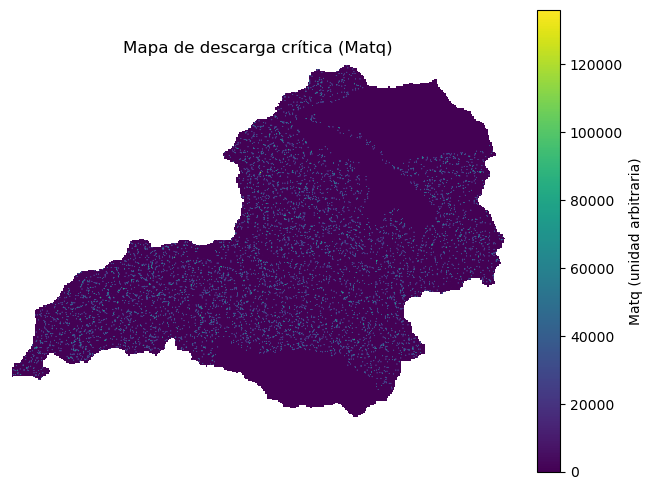

In [78]:
plt.figure(figsize=(8, 6))
plt.imshow(Matq, cmap='viridis')
plt.title('Mapa de descarga crítica (Matq)')
plt.colorbar(label='Matq (unidad arbitraria)')
plt.axis('off')
plt.show()

In [ ]:
## El segundo mapa que se obtiene es Matq, que representa el valor de lluvia (q) necesario para que fallen las celdas. 
#Este valor no aplica para celdas incondicionalmente inestables o incondicionalmente estables, solo para las celdas potencialmente inestables, 
#es decir que arrojaron valores de 4 y 3 en el mapa MatEst.


Volumen total desplazado en el área: 168,816,848.00 m³


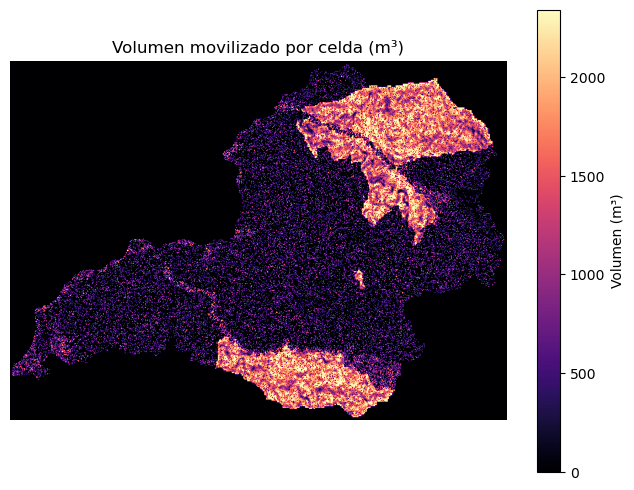

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------
# 1. Calcular volumen movilizado por celda (m³)
# Solo donde MatEst == 2 o MatEst == 3
# ---------------------------------------------
area_celda = 12.5 * 12.5  # m²
Vol = np.where(np.logical_or(MatEst == 2, MatEst == 3), espesor * area_celda, 0)

# ---------------------------------------------
# 2. Calcular volumen total (solo inestables)
# ---------------------------------------------
vol_total = np.nansum(Vol)
print(f'Volumen total desplazado en el área: {vol_total:,.2f} m³')

# ---------------------------------------------
# 3. Visualizar el mapa de volumen
# ---------------------------------------------
plt.figure(figsize=(8, 6))
plt.imshow(Vol, cmap='magma', vmin=0)
plt.title('Volumen movilizado por celda (m³)')
cbar = plt.colorbar(label='Volumen (m³)')
plt.axis('off')
plt.show()


In [ ]:
##Te imprime el volumen total movilizado (en metros cúbicos).
#Te muestra el mapa donde las celdas inestables tienen volumen; el resto, 0.


Volumen movilizado por calidad de roca:


,Volumen (m³)
Mala,111873648.0
Muy mala,45071176.0
Regular,11294216.0
Buena,577807.5


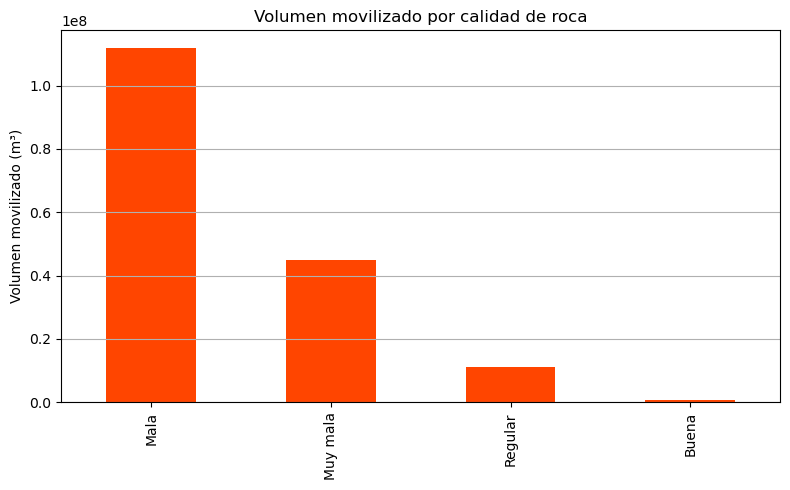

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Asegurarse de que Vol y geologia_masked tienen el mismo shape
assert Vol.shape == geologia_masked.shape, "Las dimensiones no coinciden"

# Categorías y nombres
categorias = [1, 2, 3, 4]
nombres = ['Muy mala', 'Mala', 'Regular', 'Buena']

# Calcular volumen por categoría
vol_por_categoria = {}
for valor, nombre in zip(categorias, nombres):
    mascara = (geologia_masked == valor)
    volumen_categoria = np.nansum(Vol[mascara])
    vol_por_categoria[nombre] = volumen_categoria

# Crear DataFrame
df_volumen = pd.DataFrame.from_dict(vol_por_categoria, orient='index', columns=['Volumen (m³)'])
df_volumen = df_volumen.sort_values('Volumen (m³)', ascending=False)

# Mostrar como tabla
print("\nVolumen movilizado por calidad de roca:")
display(df_volumen)

# También graficarlo
df_volumen.plot(kind='bar', legend=False, figsize=(8,5), color='orangered')
plt.ylabel("Volumen movilizado (m³)")
plt.title("Volumen movilizado por calidad de roca")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

